# Data Analysis for Ford Gobike System Data by Caleb Denzeil



## Investigation Overview


> The main goal of my investigation was to find out the duration for user types.

## Dataset Overview
> The dataset is quite large, at first their were 183412 rows with 16 features. After wrangling the, number of rows reduced to 174952 and features from 16 to 21. Some of the features that I was intrested in were duration, start time and user type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford=pd.read_csv('2019-cleanedford.csv')
ford

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_gender,bike_share_for_all_trip,Starting_time,Ending_time,Start_hour,End_hour,Start_day,End_day,Start_month,End_month
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,...,Male,No,2019-02-28 17:32:10.145000,2019-03-01 08:01:55.975000,17,8,Thu,Fri,February,March
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,...,NaN,No,2019-02-28 18:53:21.789000,2019-03-01 06:42:03.056000,18,6,Thu,Fri,February,March
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,...,Male,No,2019-02-28 12:13:13.218000,2019-03-01 05:24:08.146000,12,5,Thu,Fri,February,March
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,...,Other,No,2019-02-28 17:54:26.010000,2019-03-01 04:02:36.842000,17,4,Thu,Fri,February,March
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,...,Male,Yes,2019-02-28 23:54:18.549000,2019-03-01 00:20:44.074000,23,0,Thu,Fri,February,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,...,Male,No,2019-02-01 00:04:49.724000,2019-02-01 00:12:50.034000,0,0,Fri,Fri,February,February
183408,313,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,...,Male,No,2019-02-01 00:05:34.744000,2019-02-01 00:10:48.502000,0,0,Fri,Fri,February,February
183409,141,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,...,Male,Yes,2019-02-01 00:06:05.549000,2019-02-01 00:08:27.220000,0,0,Fri,Fri,February,February
183410,139,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,...,Male,No,2019-02-01 00:05:34.360000,2019-02-01 00:07:54.287000,0,0,Fri,Fri,February,February


## Types of bike Users



>The visual shows the size of different user types and it is clear that subscribers dominate over customers by 89.17%



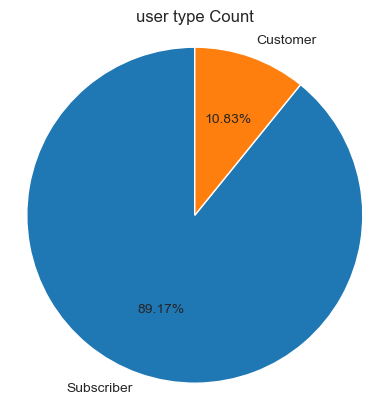

In [3]:
sorted_counts=ford.user_type.value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,startangle=90,autopct='%1.2f%%')
plt.axis('square')
plt.title('user type Count');

## Distribution for duration

> The histogram depicts the distribution for duration and most users are stacked at 300 to 700 seconds. Meaning that most bikers take approsimately 5 to 11 minutes for their rides

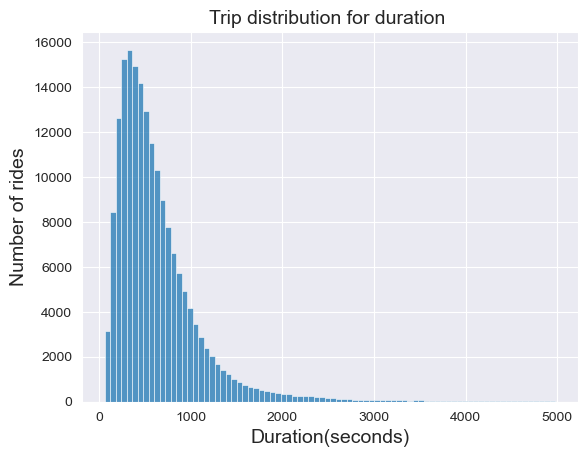

In [10]:
bin_edge=np.arange(61,5000,60)
sns.histplot(ford,x='duration_sec',bins=bin_edge)
plt.title('Trip distribution for duration ',fontsize=14)
plt.xlabel('Duration(seconds)',fontsize=14)
plt.ylabel('Number of rides',fontsize=14);

## Average duration for riders on days of the week
 > The visual shows the average duration for each day and it is relatively low from Monday to Friday Compared to Saturday  
and Sunday which is higher.


In [5]:
#convert the column Start_day to a categorital type
classes=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

vclasses=pd.api.types.CategoricalDtype(ordered=True, categories=classes)

ford['Start_day']=ford['Start_day'].astype(vclasses)


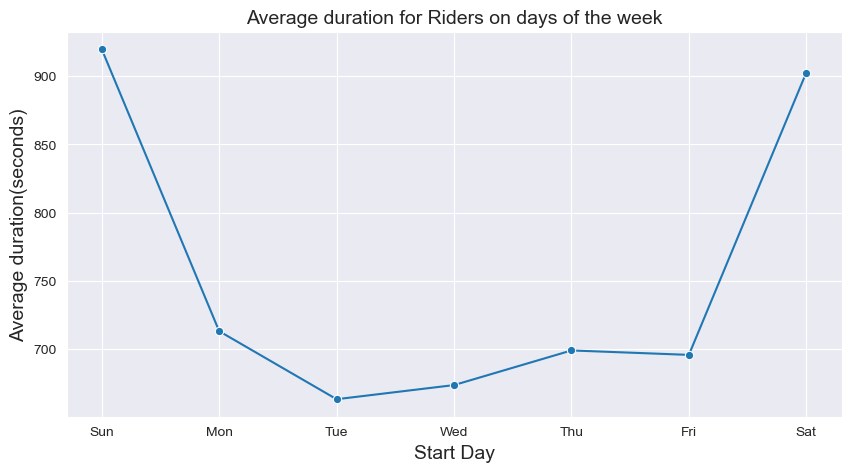

In [9]:
average_duration = ford.groupby('Start_day').duration_sec.mean()

# plot a line plot
plt.figure(figsize=[10,5])
sns.lineplot(x=average_duration.index, y=average_duration.values, marker='o')
plt.xticks(np.arange(0,7))
plt.ylabel('Average duration(seconds)',fontsize=14)
plt.xlabel('Start Day',fontsize=14)
plt.title('Average duration for Riders on days of the week',fontsize=14);

# Average duration for user type in a week
 > The lineplot shows a comparison betweeen types of users and their average duration in a week.it is clear that customers lasted longer than subscribers on average.

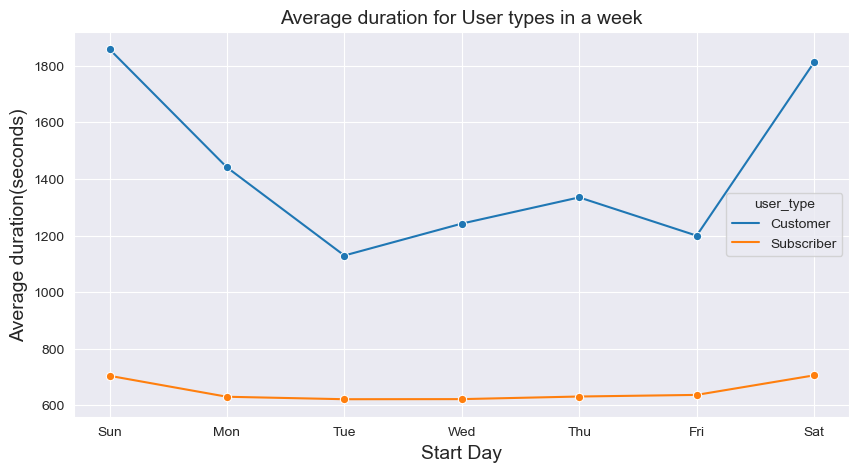

In [8]:
# plot a line plot
combined_duration = ford.groupby(['Start_day','user_type']).duration_sec.mean()
combined_duration=combined_duration.reset_index()
combined_duration
plt.figure(figsize=[10,5])
sns.lineplot(x=combined_duration['Start_day'], y=combined_duration['duration_sec'],hue=combined_duration['user_type'], marker='o')
plt.xticks(np.arange(0,7))
plt.ylabel('Average duration(seconds)',fontsize=14)
plt.xlabel('Start Day',fontsize=14)
plt.title('Average duration for User types in a week',fontsize=14);

In [11]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 758946 bytes to Part_II_slide_deck.slides.html
